# Json

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
#json 경로 가지고오기
json_path = './json/fruits.json'

with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)


In [89]:
#json_data

In [4]:
#변수 선언
categories_info = json_data['categories']
images_info = json_data['images']
annotaions_info = json_data['annotations']

#라벨링 dict
label_dict = {1:'apple', 2:'orange', 3:'kiwi'}


In [5]:
categories_info

[{'id': 1, 'name': 'apple', 'supercategory': ''},
 {'id': 2, 'name': 'orange', 'supercategory': ''},
 {'id': 3, 'name': 'kiwi', 'supercategory': ''}]

In [6]:
images_info

[{'id': 1,
  'width': 600,
  'height': 343,
  'file_name': 'fruits.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0}]

In [7]:
#list -> dict 뽑아내기

for json_image in images_info:
    file_name = json_image['file_name']
    img_width = json_image['width']
    img_height = json_image['height']
    img_id = json_image['id']
    

In [8]:
img_id

1

In [9]:
#image 파일 뽑아내기
img_path = os.path.join('../data/',file_name)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#bbox 
for json_anno in annotaions_info:
    if img_id == json_anno['image_id']:
        bbox = json_anno['bbox']
        x = int(bbox[0])
        y = int(bbox[1])
        w = int(bbox[2])
        h = int(bbox[3])
        print('box coodinates :',x,y,w,h)


        #label
        label_name = label_dict[json_anno['category_id']]
        print(label_name)

        #label별로 색 다르게 하기
        if json_anno['category_id'] == 1:
            color = (0,0,255)
        elif json_anno['category_id'] == 2:
            color = (255,0,0)
        else:
            color = (0,255,0)


        #draw bbox
        cv2.rectangle(img, (x,y),(x+w, y+h), color,2)
        
        #label draw
        img = cv2.putText(img, label_name, (x,y-10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, color,2)
        
        #####################
        # YOLO 값 변환
        #####################
        center_x = (x + w/2)/img_width
        center_y = (y + h/2)/img_height
        w = w/img_width
        h = h/img_height

        print("Yolo coordinates : ",center_x,center_y,w,h)

        #Text file save
        file_name_temp = file_name.replace('.jpg','')

    with open(f"json_{file_name_temp}.txt",'a') as f:
        f.write(f"{json_anno['category_id']} {center_x} {center_y} {w} {h}\n")

box coodinates : 15 141 160 157
orange
Yolo coordinates :  0.15833333333333333 0.6399416909620991 0.26666666666666666 0.4577259475218659
box coodinates : 90 19 130 130
orange
Yolo coordinates :  0.25833333333333336 0.24489795918367346 0.21666666666666667 0.37900874635568516
box coodinates : 430 80 153 154
apple
Yolo coordinates :  0.8441666666666666 0.4577259475218659 0.255 0.4489795918367347
box coodinates : 305 104 100 105
kiwi
Yolo coordinates :  0.5916666666666667 0.45626822157434405 0.16666666666666666 0.30612244897959184
box coodinates : 278 204 115 117
kiwi
Yolo coordinates :  0.5591666666666667 0.7653061224489796 0.19166666666666668 0.34110787172011664


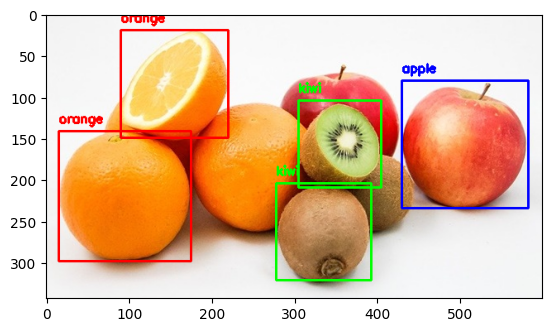

In [10]:
plt.imshow(img)
plt.show()

# XML
polygon으로segmentation해서 CVAT으로 import하면 bbox좌표가 xml파일에 없다.



In [11]:
from xml.etree.ElementTree import parse

print(label_dict)

{1: 'apple', 2: 'orange', 3: 'kiwi'}


In [12]:
'''
  <image id="0" name="fruits.jpg" width="600" height="343">
    <polygon label="orange" source="manual" occluded="0" points="47.85,155.57;29.12,172.22;18.72,198.58;15.25,226.32;19.41,242.28;27.73,261.70;48.54,281.81;63.11,290.14;85.31,299.16;117.21,295.69;143.57,283.90;164.38,257.54;175.48,227.02;172.70,195.11;158.14,167.36;123.46,145.86;90.16,141.70;63.11,145.86" z_order="0">
    </polygon>
    <polygon label="orange" source="manual" occluded="0" points="130.39,46.67;116.52,60.54;102.65,84.13;90.86,109.79;93.63,131.29;113.75,141.70;140.80,148.64;167.16,150.02;187.27,141.01;210.16,120.20;221.26,95.23;221.26,73.03;210.86,41.12;192.13,22.39;168.54,19.62;144.27,33.49" z_order="0">
    </polygon>
    <polygon label="apple" source="manual" occluded="0" points="471.66,91.76;455.02,104.94;435.60,128.52;430.05,156.27;434.90,184.70;453.63,213.14;467.50,224.94;491.78,235.34;516.75,235.34;551.43,220.08;567.39,202.05;583.34,165.98;581.95,141.01;568.08,116.03;548.66,100.08;530.62,99.39;538.95,85.51;533.40,80.66;525.77,96.61;498.02,86.21" z_order="0">
    </polygon>
    <polygon label="kiwi" source="manual" occluded="0" points="325.31,127.83;311.43,145.86;305.19,172.91;313.51,190.25;323.23,205.51;347.50,209.68;375.25,210.37;400.91,186.09;405.77,155.57;396.75,134.07;380.80,114.65;353.75,104.94;334.32,114.65" z_order="0">
    </polygon>
    <polygon label="kiwi" source="manual" occluded="0" points="312.13,212.45;295.48,220.77;289.24,233.26;282.99,247.13;278.14,272.80;285.07,288.75;301.03,315.11;316.29,321.35;344.03,322.74;369.01,313.03;387.73,289.44;393.28,256.84;387.04,236.03;373.86,217.31;357.91,210.37;337.10,204.82;323.23,207.60" z_order="0">
    </polygon>
  </image>


'''

'\n  <image id="0" name="fruits.jpg" width="600" height="343">\n    <polygon label="orange" source="manual" occluded="0" points="47.85,155.57;29.12,172.22;18.72,198.58;15.25,226.32;19.41,242.28;27.73,261.70;48.54,281.81;63.11,290.14;85.31,299.16;117.21,295.69;143.57,283.90;164.38,257.54;175.48,227.02;172.70,195.11;158.14,167.36;123.46,145.86;90.16,141.70;63.11,145.86" z_order="0">\n    </polygon>\n    <polygon label="orange" source="manual" occluded="0" points="130.39,46.67;116.52,60.54;102.65,84.13;90.86,109.79;93.63,131.29;113.75,141.70;140.80,148.64;167.16,150.02;187.27,141.01;210.16,120.20;221.26,95.23;221.26,73.03;210.86,41.12;192.13,22.39;168.54,19.62;144.27,33.49" z_order="0">\n    </polygon>\n    <polygon label="apple" source="manual" occluded="0" points="471.66,91.76;455.02,104.94;435.60,128.52;430.05,156.27;434.90,184.70;453.63,213.14;467.50,224.94;491.78,235.34;516.75,235.34;551.43,220.08;567.39,202.05;583.34,165.98;581.95,141.01;568.08,116.03;548.66,100.08;530.62,99.39;538.

In [92]:
def xml_read(xml_path):
    root = parse(xml_path).getroot()

    image_info = root.findall('image')      #<image> 주소
    
    for images in image_info:

        #변수
        image_name = images.attrib['name']
        image_path = os.path.join('../data/', image_name)
        image_width = images.attrib['width']
        image_height = images.attrib['height']

        #print(image_width, image_height)


        #img 가지고 오기
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        
        
        polygon = images.findall('polygon')
        

        for polygons in polygon:
            label = polygons.attrib['label']    #'orange', 'apple', 'kiwi'
            points = polygons.attrib['points'].split(';')   # (x1,y1; x2,y2; x3,y3; x4,y4)의 형식 -> 쪼개서 list
            point_list =[]
            for i in points:
                x, y = i.split(',')
                x= int(float(x))
                y= int(float(y))
                #print('x',x, 'y',y)

                point_list.append((x,y))

            
            #polygon line 만들기
            if label == 'orange':
                color = (0,0,255)
            elif label == 'kiwi':
                color = (255,0,0)
            else:
                color = (0,255,0)

            cv2.polylines(image,[np.array(point_list, np.int32).reshape((-1, 1, 2))], isClosed=True, color=color, thickness=2)

            x_list = [point[0] for point in point_list]
            y_list = [point[1] for point in point_list]
            x_min = min(x_list)
            x_max = max(x_list)
            y_min = min(y_list)
            y_max = max(y_list)
            #print(x_min, x_max, y_min, y_max)



            #시각화
            image = cv2.rectangle(image, (x_min,y_min), (x_max, y_max), color,2)
            #라벨 쓰기
            image = cv2.putText(image, label, (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

            
                    
            

    
        plt.imshow(image)
        plt.show()
            

    

    

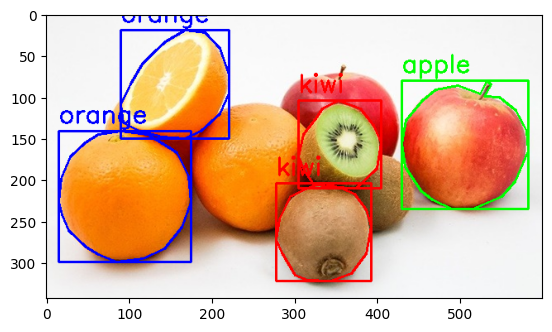

In [93]:
xml_read('./xml/fruits_CVAT.xml')